## Regression Model to predict Housing prices
* x -> feature, covariant, or predictor;independent
* y -> observaton or response; dependent

### Linear Regression Model -> Fit a line through the data. 
* fw(x) = w0 + w1 * x; -> w0 - intercept; w1 - slope; function is parameterized by w = (w0 , w1)

* Different lines with through the data will have different parameters represented by w; Need to choose the required w for the model;

* In order find the best fit - it associated to the most.
* One common cost is the RSS (Residual sum of squares);
* In RSS - we take the fitted line and look at each of the observations. Thereafter check how far the observation is from what the model would predict (The fitted line - model);
* The square of the distances derived above is noted - rss.

* RSS(w0,w1) = (house1 - [w0 + w1 * house1])^2 + (house2 - [w0 + w1 * house2])^2 + ....

* Eventually all the wo, w1 lines will be checked and whichever model providdes the lowest RSS value / minimizes the RSS - W(W hat) - (W hat 0, W hat 1) - (intercept, slope))


### Adding higher order terms
* A straight line might not be the best fit for a dataset.
* instead it could be quadratic function, 13th order polynomial, etc;

* Quadratic function -> 3 parameters -> fw(x) = w0 + w1 * x + w2 * x^2; (w0 -> intercept;)
* This is still a linear regression;
* In this case while minimizing the RSS (Residual Sum of Squares - need find the best fit / minimum - w0, w1, w2);


### Overfitting
* The model derived is not generalied but is deeply concerned one a particular dataset, and hence does not scale well with other datasets.
* Example - 13th order polynomial;


### Want good predictions but can't observe the future.
#### Simulate the model
* Remove some houses.
* Fit the model on the remaining.
* Predict heldout houses.

### Training / test split
* training set - houses used to fit the model;
* test set - houses used as a proxy for predictions;
* training error - the residual sum squares (rss) - for the training data set. -  to get the minimized estimated parameters (W hat);
* Test error - residual sum of squares of the test data set;

* The check how the test error and training error vary based on the model complexity.

### Training / Test Curve
* As the order of the model increase -> linear, quadratic, 13th order polynomial, etc - the model better fits the data set.
* Training error reduces as the model complexity increases. 
* training error (w hat) = 1/ model order complexity;
* test error (w hat) -  might not decrease with increase with order of the model;

### Adding other features
* square feet of house, bathrooms,bedrooms, lawnize,year built etc, v/s price;
* since its a 3d model - instead of fitting a line through the dataset it is preferable to fit a hyperplane through the dataset.
* fw(x) = w0 + w1 * sqft + w2 * #bath;

### Other Regression Examples
1. Salary prediction ; y hat = w hat 0 + w hat 1 * performance + w hat 2 * capstone + w hat 3 * forum;

2. Stock Prediction ; depends on - Recent history of the stock prie, news events, related commodities;

3. Tweet popularity ; depends on - followers, features of the tweeted texts, # past tweets, etc;

4. Smart house ; Smart house with sensors tha control the temperature, need to predict the temperature of a desk that has no sensor. depends on - Thermostat setting, blinds open/closed, window tint, vemts, temperature outside, time of the day;

## Regression ML Block
### The machine learning pipeline
* Data -> ML method -> Intelligence;

* Training Data -> Feature extraction (choose a subset of the features, sqft, #bath) X  -> ML model (w hat - regression coefficent) [Regression] -> (y hat) (predicted house prices) -> [Quality Metric/ error-metric / rss]

* Training Data -------------------------> feature extraction -----------> ML model --------------------------------------->Predictions
        |                                         ^                      |
        |                                         |                      |
        |                                         |                      |
        |                                       w hat                    |
        |                                         |                      |
        |                                     ML Algorithm               |
        |                                          ^                     |
        |                                          |  [error - rss]      |
        |------------------------------------->|Quality|<----------------|
                                               |Metric |            

## Predicting house prices

#### Fire up graphlab create

In [1]:
import graphlab

### Load some house sales data
* SFrame - datastructure for representing tabular data in Graphlab create.

In [2]:
sales = graphlab.SFrame('home_data.gl/')

This non-commercial license of GraphLab Create for academic use is assigned to amitha353@gmail.com and will expire on May 07, 2019.


[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: C:\Users\Amitha\AppData\Local\Temp\graphlab_server_1525973712.log.0


In [3]:
sales

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: 21613

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 7129300520 | 2014-10-13 00:00:00+00:00 |  221900 |    3     |     1     |     1180    |
| 6414100192 | 2014-12-09 00:00:00+00:00 |  538000 |    3     |    2.25   |     2570    |
| 5631500400 | 2015-02-25 00:00:00+00:00 |  180000 |    2     |     1     |     770     |
| 2487200875 | 2014-12-09 00:00:00+00:00 |  604000 |    4     |     3     |     1960    |
| 1954400510 | 2015-02-18 00:00:00+00:00 |  510000 |    3     |     2     |     1680    |
| 7237550310 | 2014-05-12 00:00:00+00:00 | 1225000 |    4     |    4.5    |     5420    |
| 1321400060 | 2014-06-27 00:00:00+00:00 |  257500 |    3     |    2.25   |     1715    |
| 2008000270 | 2015-01-15 00:00:00+00:00 |  291850 |    3     |    1.5    |     1060    |
| 2414600126 | 2015-04-15 00:00:00+00:00 |  229500 |    3     |     1     |     1780    |
| 3793500160 | 2015-03-12 00:00:00+00:00 |  323000 |    3     |    2.5    |     1890    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5650   |   1    |     0      |  0   |     3     |   7   |    1180    |       0       |
|   7242   |   2    |     0      |  0   |     3     |   7   |    2170    |      400      |
|  10000   |   1    |     0      |  0   |     3     |   6   |    770     |       0       |
|   5000   |   1    |     0      |  0   |     5     |   7   |    1050    |      910      |
|   8080   |   1    |     0      |  0   |     3     |   8   |    1680    |       0       |
|  101930  |   1    |     0      |  0   |     3     |   11  |    3890    |      1530     |
|   6819   |   2    |     0      |  0   |     3     |   7   |    1715    |       0       |
|   9711   |   1    |     0      |  0   |     3     |   7   |    1060    |       0       |
|   7470   |   1    |     0      |  0   |     3     |   7   |    1050    |      730      |
|   6560   |   2    |     0      |  0   |     3     |   7   |    1890    |       0       |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1955   |      0       |  98178  | 47.51123398 | -122.25677536 |     1340.0    | ... |
|   1951   |     1991     |  98125  | 47.72102274 |  -122.3188624 |     1690.0    | ... |
|   1933   |      0       |  98028  | 47.73792661 | -122.23319601 |     2720.0    | ... |
|   1965   |      0       |  98136  |   47.52082  | -122.39318505 |     1360.0    | ... |
|   1987   |      0       |  98074  | 47.61681228 | -122.04490059 |     1800.0    | ... |
|   2001   |      0       |  98053  | 47.65611835 | -122.00528655 |     4760.0    | ... |
|   1995   |      0       |  98003  | 47.30972002 | -122.32704857 |     2238.0    | ... |
|   1963   |      0       |  98198  | 47.40949984 | -122.31457273 |     1650.0    | ... |
|   1960   |      0       |  98146  | 47.51229381 | -122.33659507 |     1780.0    | ... |
|   2003   |      0       |  98038  | 47.36840673 |  -122

### Exploring the data for housing sales

In [4]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x = "sqft_living", y="price")

### Create simple regression model - sqfl of living v/s price
* Split training / test split

In [5]:
train_data, test_data = sales.random_split(.8, seed = 0) # 80% - training, 20% - test; 
# seed is needed inorder to attain the same result, since it is a random split. splitting will occur in the same way;

### Build the regression model

In [6]:
sqft_model = graphlab.linear_regression.create(train_data, target='price', features=['sqft_living']) 
# create a linear regression model

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16515

Number of features          : 1

Number of unpacked features : 1

Number of coefficients    : 2

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 1.029632     | 4352721.779935     | 3265272.554127       | 261940.755670 | 281328.880023   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

### Evaluate the simple model 

In [7]:
print test_data['price'].mean()

543054.042563


In [8]:
print sqft_model.evaluate(test_data)

{'max_error': 4146114.4134659404, 'rmse': 255188.64791959082}


### Predictions look like

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

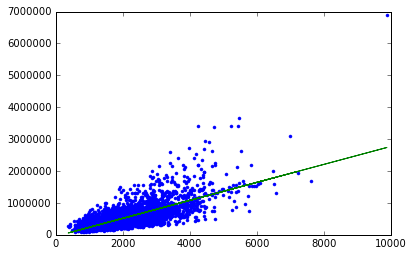

In [10]:
plt.plot(test_data['sqft_living'], test_data['price'], '.', 
         test_data['sqft_living'], sqft_model.predict(test_data), '-')

In [11]:
sqft_model.get('coefficients') 
# weights - 
# intercept , green line crosses y axis ; -$47530
# coefficient of sqft (angle) - price per sqft - avg - $282 / sqft;

Columns:
	name	str
	index	str
	value	float
	stderr	float

Rows: 2

Data:
+-------------+-------+----------------+---------------+
|     name    | index |     value      |     stderr    |
+-------------+-------+----------------+---------------+
| (intercept) |  None | -46764.0179211 | 5029.18900969 |
| sqft_living |  None | 281.663256264  | 2.21268810839 |
+-------------+-------+----------------+---------------+
[2 rows x 4 columns]

### Exploring other features in the data

In [12]:
features_list = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [13]:
sales[features_list].show()

In [14]:
sales.show(view='BoxWhisker Plot', x = 'zipcode', y = 'price')

### Build a regression model with more feature

In [15]:
many_features_model = graphlab.linear_regression.create(train_data, target='price', features = features_list)

PROGRESS: Creating a validation set from 5 percent of training data. This may take a while.
          You can set ``validation_set=None`` to disable validation tracking.



Linear regression:

--------------------------------------------------------

Number of examples          : 16541

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Validation-max_error | Training-rmse | Validation-rmse |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

| 1         | 2        | 0.104081     | 3780950.288069     | 5342470.224826       | 178917.917479 | 275683.702494   |

+-----------+----------+--------------+--------------------+----------------------+---------------+-----------------+

SUCCESS: Optimal solution found.

In [16]:
print features_list

['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']


In [17]:
print sqft_model.evaluate(test_data)
print many_features_model.evaluate(test_data)

{'max_error': 4146114.4134659404, 'rmse': 255188.64791959082}
{'max_error': 3497583.564062483, 'rmse': 177749.25979485168}


### Applying learned models to predict prices of 3 houses

In [18]:
house1 = sales[sales['id'] == '5309101200']

In [19]:
house1

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+--------+----------+-----------+-------------+
|     id     |            date           | price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+--------+----------+-----------+-------------+
| 5309101200 | 2014-06-05 00:00:00+00:00 | 620000 |    4     |    2.25   |     2400    |
+------------+---------------------------+--------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|   5350   |  1.5   |     0      |  0   |     4     |   7   |    1460    |      940      |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1929   |      0       |  98117  | 47.67632376 | -122.37010126 |     1250.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src="house1.png">

In [20]:
print house1['price']

[620000L, ... ]


In [21]:
print sqft_model.predict(house1)

[629227.7971135257]


In [22]:
print many_features_model.predict(house1)

[720276.7906953911]


###  Predictions for a second fancier house

In [23]:
house2 = sales[sales['id']=='1925069082']

In [24]:
house2

Columns:
	id	str
	date	datetime
	price	int
	bedrooms	str
	bathrooms	str
	sqft_living	int
	sqft_lot	int
	floors	str
	waterfront	int
	view	int
	condition	int
	grade	int
	sqft_above	int
	sqft_basement	int
	yr_built	int
	yr_renovated	int
	zipcode	str
	lat	float
	long	float
	sqft_living15	float
	sqft_lot15	float

Rows: Unknown

Data:
+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 1925069082 | 2015-05-11 00:00:00+00:00 | 2200000 |    5     |    4.25   |     4640    |
+------------+---------------------------+---------+----------+-----------+-------------+
+----------+--------+------------+------+-----------+-------+------------+---------------+
| sqft_lot | floors | waterfront | view | condition | grade | sqft_above | sqft_basement |
+----------+--------+------------+------+-----------+-------+------------+---------------+
|  22703   |   2    |     1      |  4   |     5     |   8   |    2860    |      1780     |
+----------+--------+------------+------+-----------+-------+------------+---------------+
+----------+--------------+---------+-------------+---------------+---------------+-----+
| yr_built | yr_renovated | zipcode |     lat     |      long     | sqft_living15 | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
|   1952   |      0       |  98052  | 47.63925783 | -122.09722322 |     3140.0    | ... |
+----------+--------------+---------+-------------+---------------+---------------+-----+
[? rows x 21 columns]
Note: Only the head of the SFrame is printed. This SFrame is lazily evaluated.
You can use sf.materialize() to force materialization.

<img src='house2.jpg'>

In [25]:
print sqft_model.predict(house2)

[1260153.491145835]


In [26]:
print many_features_model.predict(house2)

[1413319.1538824483]


In [27]:
print house2['price']

[2200000L]


### Third House

In [28]:
bill_gates = {'bedrooms':[8], 'bathrooms': [25], 'sqft_living':[50000], 'sqft_lot':[225000], 'floors':[4], 'zipcode':['98039'],
             'condition':[10], 'grade':[10], 'waterfront':[1], 'view':[4], 'sqft_above': [37500], 'sqft_basement':[12500], 
             'yr_built': [1994], 'yr_renovated': [2010], 'lat': [47.627606], 'long': [-122.242054], 'sqft_living15': [5000],
             'sqft_lot15': [40000]}

<img src='bill_gates_house.jpg'>

In [29]:
print many_features_model.predict(graphlab.SFrame(bill_gates)) # needs to converted into an sframe from a dictionary

[13672446.214259489]


In [30]:
print sqft_model.predict(graphlab.SFrame(bill_gates))

[14036398.795300096]


### Programming assignment

#### Selection and summary statistics: We found the zip code with the highest average house price. What is the average house price of that zip code?

In [31]:
highestAveragePrice = sales[sales['zipcode'] == '98039']

In [32]:
print highestAveragePrice

+------------+---------------------------+---------+----------+-----------+-------------+
|     id     |            date           |  price  | bedrooms | bathrooms | sqft_living |
+------------+---------------------------+---------+----------+-----------+-------------+
| 3625049014 | 2014-08-29 00:00:00+00:00 | 2950000 |    4     |    3.5    |     4860    |
| 2540700110 | 2015-02-12 00:00:00+00:00 | 1905000 |    4     |    3.5    |     4210    |
| 3262300940 | 2014-11-07 00:00:00+00:00 |  875000 |    3     |     1     |     1220    |
| 3262300940 | 2015-02-10 00:00:00+00:00 |  940000 |    3     |     1     |     1220    |
| 6447300265 | 2014-10-14 00:00:00+00:00 | 4000000 |    4     |    5.5    |     7080    |
| 2470100110 | 2014-08-04 00:00:00+00:00 | 5570000 |    5     |    5.75   |     9200    |
| 2210500019 | 2015-03-24 00:00:00+00:00 |  937500 |    3     |     1     |     1320    |
| 6447300345 | 2015-04-06 00:00:00+00:00 | 1160000 |    4     |     3     |     2680    |
| 64473002

In [33]:
print highestAveragePrice['price'].mean()

2160606.6


#### Filtering data: What fraction of the houses have living space between 2000 sq.ft. and 4000 sq.ft.?

In [34]:
livingSpaceRange = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] < 4000)]

In [35]:
print livingSpaceRange.num_rows()

9111


In [36]:
print sales.num_rows()

21613


In [37]:
print float(livingSpaceRange.num_rows()) / float(sales.num_rows())

0.421551843798


#### Building a regression model with several more features: What is the difference in RMSE between the model trained with my_features and the one trained with advanced_features?

In [38]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [39]:
sales[advanced_features].show()

In [40]:
# data-set split
train_data_set, test_data_set = sales.random_split(.8, seed=0)

In [41]:
# model - with limit dataset - features list
limited_features_model = graphlab.linear_regression.create(train_data_set, target = 'price', features = features_list, 
                                                           validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.098269     | 3763208.270524     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [42]:
advanced_features_model = graphlab.linear_regression.create(train_data_set, target='price', features = advanced_features,
                                                            validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.125618     | 3469012.450663     | 154580.940735 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [43]:
print limited_features_model.evaluate(test_data_set)

{'max_error': 3486584.509381928, 'rmse': 179542.43331269105}


In [44]:
print advanced_features_model.evaluate(test_data_set)

{'max_error': 3556849.413848093, 'rmse': 156831.11680191013}


In [45]:
rmse_difference = 179542.43331269105 - 156831.11680191013

In [46]:
print rmse_difference

22711.3165108
